# Importing Module

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Loading the dataset

In [2]:
df = pd.read_csv('salaries.csv')

In [3]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,USD,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,USD,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,USD,96200,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,235000,USD,235000,AU,0,AU,M
4,2024,SE,FT,Machine Learning Engineer,175000,USD,175000,AU,0,AU,M
...,...,...,...,...,...,...,...,...,...,...,...
13967,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
13968,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
13969,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
13970,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


## Data Preprocessing

In [4]:
# Checking for null values
null_values = df.isnull().sum()
print(null_values)

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [7]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Exploratory Data Analysis (EDA)

In [8]:
# Display basic information about the dataset
print("Basic Information about the Dataset:")
print(df.info())

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           13972 non-null  int64 
 1   experience_level    13972 non-null  object
 2   employment_type     13972 non-null  object
 3   job_title           13972 non-null  object
 4   salary              13972 non-null  int64 
 5   salary_currency     13972 non-null  object
 6   salary_in_usd       13972 non-null  int64 
 7   employee_residence  13972 non-null  object
 8   remote_ratio        13972 non-null  int64 
 9   company_location    13972 non-null  object
 10  company_size        13972 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB
None


In [10]:
# Summary statistics of numerical columns
print("\nSummary Statistics of Numerical Columns:")
df.describe()


Summary Statistics of Numerical Columns:


,work_year,salary,salary_in_usd,remote_ratio
count,13972.000000,1.397200e+04,13972.000000,13972.000000
mean,2023.085600,1.660011e+05,150028.812124,33.334526
std,0.687612,3.661545e+05,68634.306349,46.682931
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.040000e+05,103000.000000,0.000000
50%,2023.000000,1.422000e+05,141600.000000,0.000000
75%,2024.000000,1.880000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [11]:
# Summary statistics of categorical columns
print("\nSummary Statistics of Categorical Columns:")
df.describe(include=['object'])


Summary Statistics of Categorical Columns:


,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,13972,13972,13972,13972,13972,13972,13972
unique,4,4,146,23,88,77,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,9248,13912,3017,12876,12171,12220,12831


# Visualization 1: Histogram of Salary Distribution

C:\Users\Rajiv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


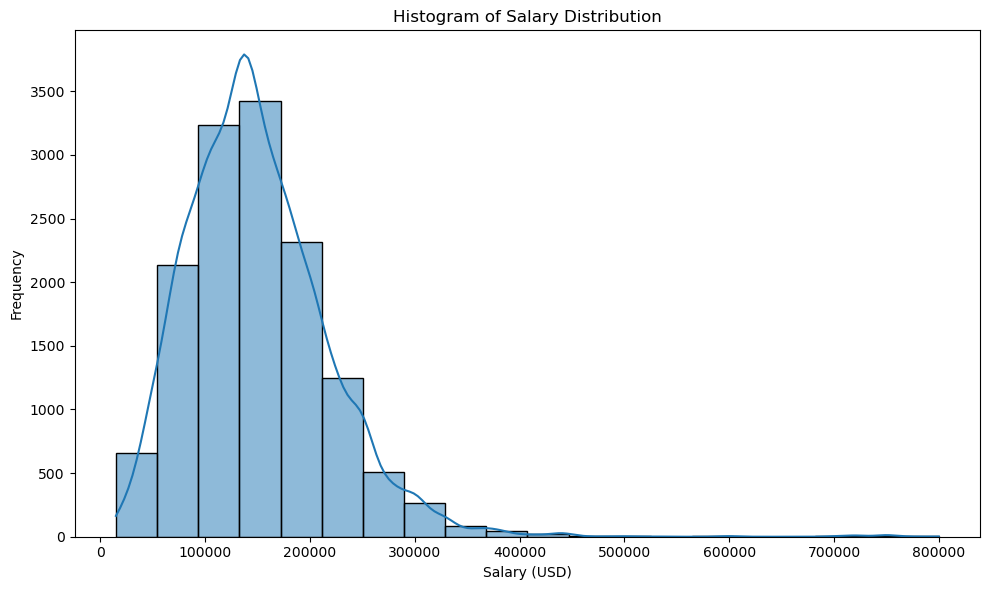

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=20, kde=True)
plt.title('Histogram of Salary Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualization 2: Bar plot of remote Work Ratio by Company Size

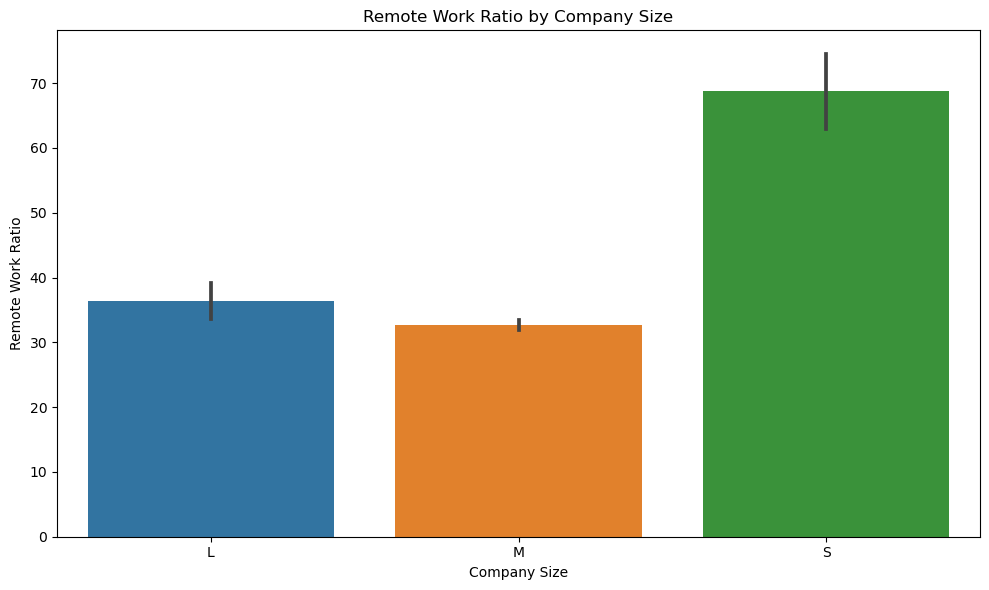

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='company_size', y='remote_ratio', data=df)
plt.title('Remote Work Ratio by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Remote Work Ratio')
plt.tight_layout()
plt.show()
